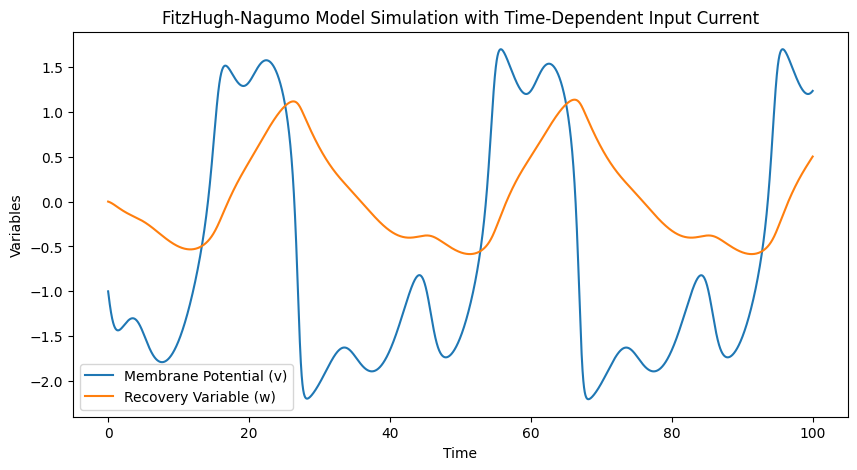

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def fitzhugh_nagumo_model(y, t, I_t, a, b, tau):
    """
    FitzHugh-Nagumo model equations with time-dependent external current.

    Parameters:
        y (list): Current state [v, w].
        t (numpy array): Time points for integration.
        I_t (function): Time-dependent external current.
        a (float): Model parameter.
        b (float): Model parameter.
        tau (float): Time constant.

    Returns:
        dydt (list): Derivatives [dv/dt, dw/dt].
    """
    v, w = y
    dvdt = v - (v**3)/3 - w + I_t(t)
    dwdt = (v + a - b * w) / tau
    return [dvdt, dwdt]

def simulate_fitzhugh_nagumo(I_t, a=0.7, b=0.8, tau=12.5, v0=-1.0, w0=0.0, t_end=100, dt=0.01):
    """
    Simulate the FitzHugh-Nagumo model with time-dependent external current.

    Parameters:
        I_t (function): Time-dependent external current function.
        a (float): Model parameter.
        b (float): Model parameter.
        tau (float): Time constant.
        v0 (float): Initial membrane potential.
        w0 (float): Initial recovery variable.
        t_end (float): End time of simulation.
        dt (float): Time step for integration.

    Returns:
        t (numpy array): Time points.
        v (numpy array): Membrane potential over time.
        w (numpy array): Recovery variable over time.
    """
    # Time points for integration
    t = np.arange(0, t_end, dt)

    # Initial conditions
    initial_conditions = [v0, w0]

    # Solve the ODEs
    solution = odeint(fitzhugh_nagumo_model, initial_conditions, t, args=(I_t, a, b, tau))

    # Extract solution components
    v, w = solution.T

    return t, v, w

# Example of a time-dependent input current function
def input_current(t):
    # Example: A sinusoidal current
    return 0.5 * np.sin(2 * np.pi * 0.1 * t)

# Example usage with a time-dependent input current
time_points, membrane_potential, recovery_variable = simulate_fitzhugh_nagumo(
    I_t=input_current, a=0.7, b=0.8, tau=12.5
)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time_points, membrane_potential, label='Membrane Potential (v)')
plt.plot(time_points, recovery_variable, label='Recovery Variable (w)')
plt.title('FitzHugh-Nagumo Model Simulation with Time-Dependent Input Current')
plt.xlabel('Time')
plt.ylabel('Variables')
plt.legend()
plt.show()
